<a href="https://colab.research.google.com/github/yohangumiel/Data-analysis/blob/main/HarryPotter/Aula_UFMG_C%C3%B3digo_3_(Harry_Potter_Ingl%C3%AAs).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Aula 1
No script do colab:
1. Importar as bibliotecas necessárias para trabalhar com o texto (NLTK, Pandas? etc)
2. Ler um dos arquivos txt ( o português primeiro)
3. Eliminar os comentários dentro do arquivo entre <  >
4. Tokenizar em palavras e contar número de palavras
5. Obter a lista de palavras mais frequentes
6. Obter os bigramas e trigramas mais *frequentes*

In [1]:
pip install nltk==3.6.2

In [2]:
from google.colab import drive # ler arquivos no google drive
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize,sent_tokenize
from datetime import datetime
from collections import Counter
from nltk import ngrams
import string
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
pd.set_option('max_columns', None)
pd.set_option('max_colwidth', None)

In [4]:
remove_en = string.punctuation
#remove_en = remove_en.replace("'","").replace("´","").replace("`","").replace("-","")
remove_en

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [5]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words_en = set(stopwords.words('english'))
stop_words_en

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

# Abre o arquivo



In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
with open('/content/drive/MyDrive/HarryPotter/Harry Potter and the chamber of secrets.txt', encoding='utf8', mode = "r") as f:
    filecontent = f.read()

In [8]:
print(filecontent[0:1000])

﻿<título> THE WORST BIRTHDAY. 

Not for the first time, an argument had broken out over breakfast at number four, Privet Drive. Mr Vernon Dursley had been woken in the early hours of the morning by a loud, hooting noise from his nephew Harry's room. 

"Third time this week?" he roared across the table. If you can't control that owl, it'll have to go!" 

Harry tried, yet again, to explain. 

"She's bored," he said. "She´s used to flying around outside. If I could just let her out at night -" 

"Do I look stupid?" snarled Uncle Vernon, a bit of fried egg dangling from his bushy mustache. "I know what'll happen if that owl's let out."  

He exchanged dark looks with his wife, Petunia. 

Harry tried to argue back but his words were drowned by a long, loud belch from the Dursleys' son, Dudley. 

"I want more bacon." 

"There's more in the frying pan, sweetums, said Aunt Petunia, turning misty eyes on her massive son. "We must build you up while we've got the chance... I don't like the sound

# Qual o tipo de arquivo?

In [9]:
type(filecontent)

str

# Qual o tamanho do arquivo texto?

In [10]:
len(filecontent)

495435

# Removendo comentários marcados em <> e </>

In [11]:
import re 
teste1 = "<anúncio de evento> GILDEROY LOCKHART will be signing copies of his autobiography MAGICAL ME today 12:30 P.m. to 4:30 P.m. </anúncio de evento>"
re.sub("\s?<.*?>\s?", "", teste1)

'GILDEROY LOCKHART will be signing copies of his autobiography MAGICAL ME today 12:30 P.m. to 4:30 P.m.'

In [12]:
teste2 = "<música> His eyes are as green as fresh pickled toad, His hair as dark as a blackboard. I wish he was mine, he´s really divine, The hero who conquered the Dark Lord. </música>"
re.sub("\s?<.*?>\s?", "", teste2)

'His eyes are as green as fresh pickled toad, His hair as dark as a blackboard. I wish he was mine, he´s really divine, The hero who conquered the Dark Lord.'

In [13]:
texto = re.sub("\s?<.*?>\s?", "", filecontent)
print(texto[0:1000])

﻿THE WORST BIRTHDAY. 

Not for the first time, an argument had broken out over breakfast at number four, Privet Drive. Mr Vernon Dursley had been woken in the early hours of the morning by a loud, hooting noise from his nephew Harry's room. 

"Third time this week?" he roared across the table. If you can't control that owl, it'll have to go!" 

Harry tried, yet again, to explain. 

"She's bored," he said. "She´s used to flying around outside. If I could just let her out at night -" 

"Do I look stupid?" snarled Uncle Vernon, a bit of fried egg dangling from his bushy mustache. "I know what'll happen if that owl's let out."  

He exchanged dark looks with his wife, Petunia. 

Harry tried to argue back but his words were drowned by a long, loud belch from the Dursleys' son, Dudley. 

"I want more bacon." 

"There's more in the frying pan, sweetums, said Aunt Petunia, turning misty eyes on her massive son. "We must build you up while we've got the chance... I don't like the sound of that 

# Tranformando o texto em sentenças pelo sent_tokenize

In [14]:
sentencas = []
for sentence in sent_tokenize(texto, language = 'english'):
    sentencas.append(sentence)

In [15]:
index = 0
for sentenca in sentencas[0:100]: # mostrando as 100 primeiras
    
    print('Sentença número ' + str(index) + ': ' + sentenca)
    index+=1

Sentença número 0: ﻿THE WORST BIRTHDAY.
Sentença número 1: Not for the first time, an argument had broken out over breakfast at number four, Privet Drive.
Sentença número 2: Mr Vernon Dursley had been woken in the early hours of the morning by a loud, hooting noise from his nephew Harry's room.
Sentença número 3: "Third time this week?"
Sentença número 4: he roared across the table.
Sentença número 5: If you can't control that owl, it'll have to go!"
Sentença número 6: Harry tried, yet again, to explain.
Sentença número 7: "She's bored," he said.
Sentença número 8: "She´s used to flying around outside.
Sentença número 9: If I could just let her out at night -" 

"Do I look stupid?"
Sentença número 10: snarled Uncle Vernon, a bit of fried egg dangling from his bushy mustache.
Sentença número 11: "I know what'll happen if that owl's let out."
Sentença número 12: He exchanged dark looks with his wife, Petunia.
Sentença número 13: Harry tried to argue back but his words were drowned by a l

# Poderia ser feita a segmentação por quebra de linha e depois pelo sent_tokenize

In [16]:
sentencas_linha = []
for sentence in texto.split('\n'):
    if sentence != '':
        for processed_sentence in sent_tokenize(sentence, language = 'english'):
            sentencas_linha.append(processed_sentence)

In [17]:
index = 0
for sentenca in sentencas_linha[0:100]: # mostrando as 100 primeiras
    
    print('Sentença número ' + str(index) + ': ' + sentenca)
    index+=1

Sentença número 0: ﻿THE WORST BIRTHDAY.
Sentença número 1: Not for the first time, an argument had broken out over breakfast at number four, Privet Drive.
Sentença número 2: Mr Vernon Dursley had been woken in the early hours of the morning by a loud, hooting noise from his nephew Harry's room.
Sentença número 3: "Third time this week?"
Sentença número 4: he roared across the table.
Sentença número 5: If you can't control that owl, it'll have to go!"
Sentença número 6: Harry tried, yet again, to explain.
Sentença número 7: "She's bored," he said.
Sentença número 8: "She´s used to flying around outside.
Sentença número 9: If I could just let her out at night -"
Sentença número 10: "Do I look stupid?"
Sentença número 11: snarled Uncle Vernon, a bit of fried egg dangling from his bushy mustache.
Sentença número 12: "I know what'll happen if that owl's let out."
Sentença número 13: He exchanged dark looks with his wife, Petunia.
Sentença número 14: Harry tried to argue back but his words w

# Tokenização

In [18]:
sentencas_tokenizadas = [] 

for sentenca in sentencas_linha:
    tokenized_sentence = word_tokenize(sentenca, language='english')
    sentencas_tokenizadas.append(tokenized_sentence)

In [19]:
index = 0
for tokens in sentencas_tokenizadas[0:100]: # mostrando as 100 primeiras
    
    print('Sentença número ' + str(index) + ': ' + str(tokens))
    index+=1

Sentença número 0: ['\ufeffTHE', 'WORST', 'BIRTHDAY', '.']
Sentença número 1: ['Not', 'for', 'the', 'first', 'time', ',', 'an', 'argument', 'had', 'broken', 'out', 'over', 'breakfast', 'at', 'number', 'four', ',', 'Privet', 'Drive', '.']
Sentença número 2: ['Mr', 'Vernon', 'Dursley', 'had', 'been', 'woken', 'in', 'the', 'early', 'hours', 'of', 'the', 'morning', 'by', 'a', 'loud', ',', 'hooting', 'noise', 'from', 'his', 'nephew', 'Harry', "'s", 'room', '.']
Sentença número 3: ['``', 'Third', 'time', 'this', 'week', '?', "''"]
Sentença número 4: ['he', 'roared', 'across', 'the', 'table', '.']
Sentença número 5: ['If', 'you', 'ca', "n't", 'control', 'that', 'owl', ',', 'it', "'ll", 'have', 'to', 'go', '!', "''"]
Sentença número 6: ['Harry', 'tried', ',', 'yet', 'again', ',', 'to', 'explain', '.']
Sentença número 7: ['``', 'She', "'s", 'bored', ',', "''", 'he', 'said', '.']
Sentença número 8: ['``', 'She´s', 'used', 'to', 'flying', 'around', 'outside', '.']
Sentença número 9: ['If', 'I', '

# Pre-processamento dos elementos tokenizados

In [20]:
sent_tokenizada_preprocessed = []
for sent_tokenizada in sentencas_tokenizadas:
    raw = [token.lower() for token in sent_tokenizada]

    raw = [re.sub(r"\d+[.,]?\d*","", s) for s in raw]
    raw = [s for s in raw if s not in stop_words_en] # stopwords
    raw = [''.join(c for c in s if c not in remove_en) for s in raw]   
    raw = [' '.join(s.split()) for s in raw if s]
    string = ' '.join(raw).rstrip().lstrip()
    if string != '':
        sent_tokenizada_preprocessed.append(string)
 


In [21]:
index = 0
for texto in sent_tokenizada_preprocessed[0:100]: # mostrando as 100 primeiras
    
    print('Sentença número ' + str(index) + ': ' + str(texto))
    index+=1



Sentença número 0: ﻿the worst birthday
Sentença número 1: first time argument broken breakfast number four privet drive
Sentença número 2: mr vernon dursley woken early hours morning loud hooting noise nephew harry s room
Sentença número 3: third time week
Sentença número 4: roared across table
Sentença número 5: ca nt control owl ll go
Sentença número 6: harry tried yet explain
Sentença número 7: s bored said
Sentença número 8: she´s used flying around outside
Sentença número 9: could let night
Sentença número 10: look stupid
Sentença número 11: snarled uncle vernon bit fried egg dangling bushy mustache
Sentença número 12: know ll happen owl s let
Sentença número 13: exchanged dark looks wife petunia
Sentença número 14: harry tried argue back words drowned long loud belch dursleys son dudley
Sentença número 15: want bacon
Sentença número 16: s frying pan sweetums said aunt petunia turning misty eyes massive son
Sentença número 17: must build ve got chance
Sentença número 18: nt like s

# Unigramas

In [22]:
ngram_value = 1
most_common_value = 100

# ngram_counts = []
# for s in sent_tokenizada_preprocessed:
#     ngram_counts.append(list(ngrams(s.split(), ngram_value)))

ngram_counts = [list(ngrams(s.split(), ngram_value)) for s in sent_tokenizada_preprocessed]
flat_ngram_counts = [item for sublist in ngram_counts for item in sublist]
ngram_list = Counter(flat_ngram_counts)

common = ngram_list.most_common(most_common_value)

df_common = pd.DataFrame(common, columns = ['Ngram','Count'])

In [23]:
index = 0
for n_gram in ngram_counts[0:100]: # mostrando as 100 primeiras
    
    print('Sentença número ' + str(index) + ': ' + str(n_gram))
    index+=1

Sentença número 0: [('\ufeffthe',), ('worst',), ('birthday',)]
Sentença número 1: [('first',), ('time',), ('argument',), ('broken',), ('breakfast',), ('number',), ('four',), ('privet',), ('drive',)]
Sentença número 2: [('mr',), ('vernon',), ('dursley',), ('woken',), ('early',), ('hours',), ('morning',), ('loud',), ('hooting',), ('noise',), ('nephew',), ('harry',), ('s',), ('room',)]
Sentença número 3: [('third',), ('time',), ('week',)]
Sentença número 4: [('roared',), ('across',), ('table',)]
Sentença número 5: [('ca',), ('nt',), ('control',), ('owl',), ('ll',), ('go',)]
Sentença número 6: [('harry',), ('tried',), ('yet',), ('explain',)]
Sentença número 7: [('s',), ('bored',), ('said',)]
Sentença número 8: [('she´s',), ('used',), ('flying',), ('around',), ('outside',)]
Sentença número 9: [('could',), ('let',), ('night',)]
Sentença número 10: [('look',), ('stupid',)]
Sentença número 11: [('snarled',), ('uncle',), ('vernon',), ('bit',), ('fried',), ('egg',), ('dangling',), ('bushy',), ('

In [24]:
index = 0
for n_gram in flat_ngram_counts[0:100]: # mostrando as 100 primeiras
    
    print('Ngram número ' + str(index) + ': ' + str(n_gram))
    index+=1

Ngram número 0: ('\ufeffthe',)
Ngram número 1: ('worst',)
Ngram número 2: ('birthday',)
Ngram número 3: ('first',)
Ngram número 4: ('time',)
Ngram número 5: ('argument',)
Ngram número 6: ('broken',)
Ngram número 7: ('breakfast',)
Ngram número 8: ('number',)
Ngram número 9: ('four',)
Ngram número 10: ('privet',)
Ngram número 11: ('drive',)
Ngram número 12: ('mr',)
Ngram número 13: ('vernon',)
Ngram número 14: ('dursley',)
Ngram número 15: ('woken',)
Ngram número 16: ('early',)
Ngram número 17: ('hours',)
Ngram número 18: ('morning',)
Ngram número 19: ('loud',)
Ngram número 20: ('hooting',)
Ngram número 21: ('noise',)
Ngram número 22: ('nephew',)
Ngram número 23: ('harry',)
Ngram número 24: ('s',)
Ngram número 25: ('room',)
Ngram número 26: ('third',)
Ngram número 27: ('time',)
Ngram número 28: ('week',)
Ngram número 29: ('roared',)
Ngram número 30: ('across',)
Ngram número 31: ('table',)
Ngram número 32: ('ca',)
Ngram número 33: ('nt',)
Ngram número 34: ('control',)
Ngram número 35: ('o

In [25]:
ngram_list

Counter({('\ufeffthe',): 1,
         ('worst',): 13,
         ('birthday',): 11,
         ('first',): 71,
         ('time',): 146,
         ('argument',): 2,
         ('broken',): 13,
         ('breakfast',): 14,
         ('number',): 7,
         ('four',): 22,
         ('privet',): 7,
         ('drive',): 7,
         ('mr',): 135,
         ('vernon',): 41,
         ('dursley',): 5,
         ('woken',): 5,
         ('early',): 9,
         ('hours',): 15,
         ('morning',): 21,
         ('loud',): 37,
         ('hooting',): 1,
         ('noise',): 21,
         ('nephew',): 2,
         ('harry',): 1649,
         ('s',): 1148,
         ('room',): 99,
         ('third',): 10,
         ('week',): 8,
         ('roared',): 16,
         ('across',): 33,
         ('table',): 40,
         ('ca',): 49,
         ('nt',): 701,
         ('control',): 8,
         ('owl',): 16,
         ('ll',): 176,
         ('go',): 156,
         ('tried',): 42,
         ('yet',): 35,
         ('explain',): 14,


In [26]:
common

[(('harry',), 1649),
 (('said',), 1218),
 (('s',), 1148),
 (('ron',), 705),
 (('nt',), 701),
 (('hermione',), 321),
 (('back',), 279),
 (('could',), 272),
 (('lockhart',), 234),
 (('one',), 218),
 (('malfoy',), 218),
 (('ve',), 202),
 (('professor',), 193),
 (('got',), 188),
 (('would',), 187),
 (('like',), 178),
 (('ll',), 176),
 (('d',), 175),
 (('around',), 173),
 (('weasley',), 168),
 (('know',), 164),
 (('hagrid',), 164),
 (('dumbledore',), 158),
 (('go',), 156),
 (('looked',), 156),
 (('dobby',), 151),
 (('see',), 150),
 (('think',), 148),
 (('eyes',), 147),
 (('time',), 146),
 (('re',), 146),
 (('get',), 138),
 (('mr',), 135),
 (('riddle',), 132),
 (('right',), 131),
 (('potter',), 128),
 (('still',), 127),
 (('door',), 126),
 (('face',), 120),
 (('look',), 118),
 (('come',), 118),
 (('head',), 117),
 (('never',), 116),
 (('ginny',), 116),
 (('though',), 115),
 (('looking',), 115),
 (('long',), 113),
 (('voice',), 113),
 (('school',), 111),
 (('something',), 109),
 (('well',), 1

In [27]:
df_common.head(30)

,Ngram,Count
0,"(harry,)",1649
1,"(said,)",1218
2,"(s,)",1148
3,"(ron,)",705
4,"(nt,)",701
5,"(hermione,)",321
6,"(back,)",279
7,"(could,)",272
8,"(lockhart,)",234
9,"(one,)",218


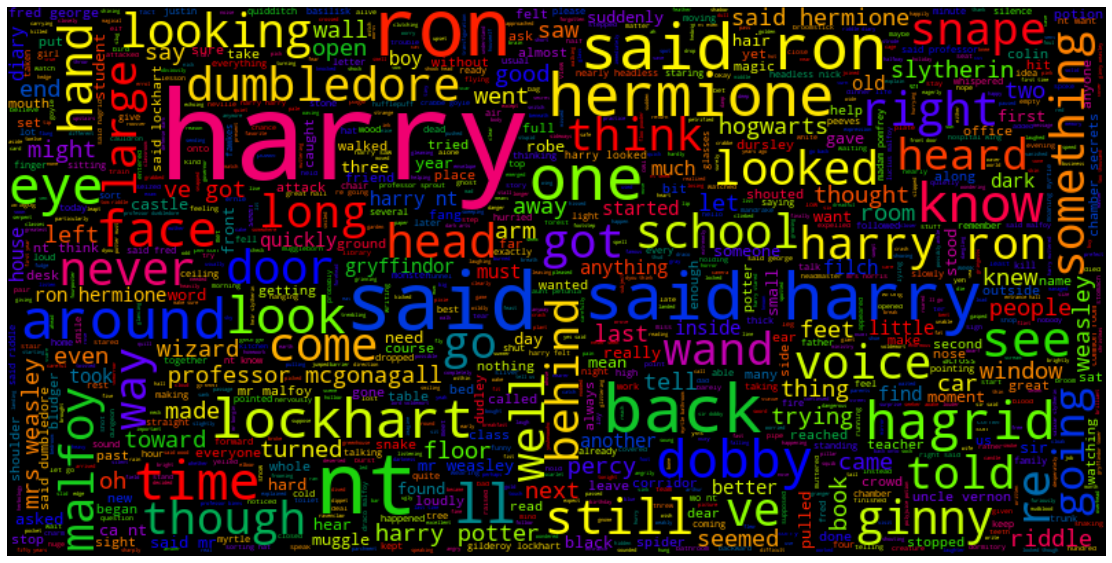

In [28]:
color = 'black'
height = 400
width = 800
max_words = 2000
colormap = 'prism'
size_X = 50
size_Y = 50

str_text=" ".join(sent_tokenizada_preprocessed)


wordcloud = WordCloud(background_color = color, max_words = max_words, max_font_size = 90, colormap = colormap, height = height, width = width).generate(str_text)

X = size_X/2.54
Y = size_Y/2.25

fig = plt.figure(figsize = [X, Y])
plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.box(False)
plt.show()

# Bigramas

In [29]:
ngram_value = 2
most_common_value = 100

# ngram_counts = []
# for s in sent_tokenizada_preprocessed:
#     ngram_counts.append(list(ngrams(s.split(), ngram_value)))

ngram_counts = [list(ngrams(s.split(), ngram_value)) for s in sent_tokenizada_preprocessed]
flat_ngram_counts = [item for sublist in ngram_counts for item in sublist]
ngram_list = Counter(flat_ngram_counts)

common = ngram_list.most_common(most_common_value)

df_common = pd.DataFrame(common, columns = ['Ngram','Count'])

In [30]:
index = 0
for n_gram in ngram_counts[0:100]: # mostrando as 100 primeiras
    
    print('Sentença número ' + str(index) + ': ' + str(n_gram))
    index+=1

Sentença número 0: [('\ufeffthe', 'worst'), ('worst', 'birthday')]
Sentença número 1: [('first', 'time'), ('time', 'argument'), ('argument', 'broken'), ('broken', 'breakfast'), ('breakfast', 'number'), ('number', 'four'), ('four', 'privet'), ('privet', 'drive')]
Sentença número 2: [('mr', 'vernon'), ('vernon', 'dursley'), ('dursley', 'woken'), ('woken', 'early'), ('early', 'hours'), ('hours', 'morning'), ('morning', 'loud'), ('loud', 'hooting'), ('hooting', 'noise'), ('noise', 'nephew'), ('nephew', 'harry'), ('harry', 's'), ('s', 'room')]
Sentença número 3: [('third', 'time'), ('time', 'week')]
Sentença número 4: [('roared', 'across'), ('across', 'table')]
Sentença número 5: [('ca', 'nt'), ('nt', 'control'), ('control', 'owl'), ('owl', 'll'), ('ll', 'go')]
Sentença número 6: [('harry', 'tried'), ('tried', 'yet'), ('yet', 'explain')]
Sentença número 7: [('s', 'bored'), ('bored', 'said')]
Sentença número 8: [('she´s', 'used'), ('used', 'flying'), ('flying', 'around'), ('around', 'outside

In [31]:
index = 0
for n_gram in flat_ngram_counts[0:100]: # mostrando as 100 primeiras
    
    print('Ngram número ' + str(index) + ': ' + str(n_gram))
    index+=1

Ngram número 0: ('\ufeffthe', 'worst')
Ngram número 1: ('worst', 'birthday')
Ngram número 2: ('first', 'time')
Ngram número 3: ('time', 'argument')
Ngram número 4: ('argument', 'broken')
Ngram número 5: ('broken', 'breakfast')
Ngram número 6: ('breakfast', 'number')
Ngram número 7: ('number', 'four')
Ngram número 8: ('four', 'privet')
Ngram número 9: ('privet', 'drive')
Ngram número 10: ('mr', 'vernon')
Ngram número 11: ('vernon', 'dursley')
Ngram número 12: ('dursley', 'woken')
Ngram número 13: ('woken', 'early')
Ngram número 14: ('early', 'hours')
Ngram número 15: ('hours', 'morning')
Ngram número 16: ('morning', 'loud')
Ngram número 17: ('loud', 'hooting')
Ngram número 18: ('hooting', 'noise')
Ngram número 19: ('noise', 'nephew')
Ngram número 20: ('nephew', 'harry')
Ngram número 21: ('harry', 's')
Ngram número 22: ('s', 'room')
Ngram número 23: ('third', 'time')
Ngram número 24: ('time', 'week')
Ngram número 25: ('roared', 'across')
Ngram número 26: ('across', 'table')
Ngram número 

In [32]:
ngram_list

Counter({('\ufeffthe', 'worst'): 1,
         ('worst', 'birthday'): 1,
         ('first', 'time'): 10,
         ('time', 'argument'): 1,
         ('argument', 'broken'): 1,
         ('broken', 'breakfast'): 1,
         ('breakfast', 'number'): 1,
         ('number', 'four'): 1,
         ('four', 'privet'): 1,
         ('privet', 'drive'): 7,
         ('mr', 'vernon'): 1,
         ('vernon', 'dursley'): 1,
         ('dursley', 'woken'): 1,
         ('woken', 'early'): 2,
         ('early', 'hours'): 1,
         ('hours', 'morning'): 1,
         ('morning', 'loud'): 1,
         ('loud', 'hooting'): 1,
         ('hooting', 'noise'): 1,
         ('noise', 'nephew'): 1,
         ('nephew', 'harry'): 1,
         ('harry', 's'): 141,
         ('s', 'room'): 4,
         ('third', 'time'): 1,
         ('time', 'week'): 1,
         ('roared', 'across'): 1,
         ('across', 'table'): 1,
         ('ca', 'nt'): 49,
         ('nt', 'control'): 2,
         ('control', 'owl'): 1,
         ('owl', '

In [33]:
common

[(('said', 'harry'), 226),
 (('said', 'ron'), 208),
 (('harry', 's'), 141),
 (('harry', 'ron'), 88),
 (('professor', 'mcgonagall'), 87),
 (('harry', 'potter'), 79),
 (('said', 'hermione'), 68),
 (('ve', 'got'), 64),
 (('could', 'nt'), 61),
 (('mrs', 'weasley'), 58),
 (('ron', 'hermione'), 55),
 (('mr', 'weasley'), 52),
 (('harry', 'could'), 51),
 (('ca', 'nt'), 49),
 (('ron', 's'), 49),
 (('harry', 'said'), 48),
 (('fred', 'george'), 45),
 (('mr', 'malfoy'), 45),
 (('chamber', 'secrets'), 44),
 (('uncle', 'vernon'), 39),
 (('would', 'nt'), 38),
 (('said', 'lockhart'), 38),
 (('lockhart', 's'), 37),
 (('said', 'dumbledore'), 37),
 (('nt', 'think'), 36),
 (('said', 'mr'), 34),
 (('harry', 'looked'), 33),
 (('gilderoy', 'lockhart'), 33),
 (('said', 'professor'), 33),
 (('nearly', 'headless'), 33),
 (('headless', 'nick'), 33),
 (('said', 'riddle'), 33),
 (('nt', 'know'), 32),
 (('hagrid', 's'), 32),
 (('harry', 'nt'), 31),
 (('riddle', 's'), 31),
 (('wo', 'nt'), 30),
 (('hermione', 's'), 3

In [34]:
df_common.head(30)

,Ngram,Count
0,"(said, harry)",226
1,"(said, ron)",208
2,"(harry, s)",141
3,"(harry, ron)",88
4,"(professor, mcgonagall)",87
5,"(harry, potter)",79
6,"(said, hermione)",68
7,"(ve, got)",64
8,"(could, nt)",61
9,"(mrs, weasley)",58


# Trigramas

In [35]:
ngram_value = 3
most_common_value = 100

# ngram_counts = []
# for s in sent_tokenizada_preprocessed:
#     ngram_counts.append(list(ngrams(s.split(), ngram_value)))

ngram_counts = [list(ngrams(s.split(), ngram_value)) for s in sent_tokenizada_preprocessed]
flat_ngram_counts = [item for sublist in ngram_counts for item in sublist]
ngram_list = Counter(flat_ngram_counts)

common = ngram_list.most_common(most_common_value)

df_common = pd.DataFrame(common, columns = ['Ngram','Count'])

In [36]:
index = 0
for n_gram in ngram_counts[0:100]: # mostrando as 100 primeiras
    
    print('Sentença número ' + str(index) + ': ' + str(n_gram))
    index+=1

Sentença número 0: [('\ufeffthe', 'worst', 'birthday')]
Sentença número 1: [('first', 'time', 'argument'), ('time', 'argument', 'broken'), ('argument', 'broken', 'breakfast'), ('broken', 'breakfast', 'number'), ('breakfast', 'number', 'four'), ('number', 'four', 'privet'), ('four', 'privet', 'drive')]
Sentença número 2: [('mr', 'vernon', 'dursley'), ('vernon', 'dursley', 'woken'), ('dursley', 'woken', 'early'), ('woken', 'early', 'hours'), ('early', 'hours', 'morning'), ('hours', 'morning', 'loud'), ('morning', 'loud', 'hooting'), ('loud', 'hooting', 'noise'), ('hooting', 'noise', 'nephew'), ('noise', 'nephew', 'harry'), ('nephew', 'harry', 's'), ('harry', 's', 'room')]
Sentença número 3: [('third', 'time', 'week')]
Sentença número 4: [('roared', 'across', 'table')]
Sentença número 5: [('ca', 'nt', 'control'), ('nt', 'control', 'owl'), ('control', 'owl', 'll'), ('owl', 'll', 'go')]
Sentença número 6: [('harry', 'tried', 'yet'), ('tried', 'yet', 'explain')]
Sentença número 7: [('s', 'bo

In [37]:
index = 0
for n_gram in flat_ngram_counts[0:100]: # mostrando as 100 primeiras
    
    print('Ngram número ' + str(index) + ': ' + str(n_gram))
    index+=1

Ngram número 0: ('\ufeffthe', 'worst', 'birthday')
Ngram número 1: ('first', 'time', 'argument')
Ngram número 2: ('time', 'argument', 'broken')
Ngram número 3: ('argument', 'broken', 'breakfast')
Ngram número 4: ('broken', 'breakfast', 'number')
Ngram número 5: ('breakfast', 'number', 'four')
Ngram número 6: ('number', 'four', 'privet')
Ngram número 7: ('four', 'privet', 'drive')
Ngram número 8: ('mr', 'vernon', 'dursley')
Ngram número 9: ('vernon', 'dursley', 'woken')
Ngram número 10: ('dursley', 'woken', 'early')
Ngram número 11: ('woken', 'early', 'hours')
Ngram número 12: ('early', 'hours', 'morning')
Ngram número 13: ('hours', 'morning', 'loud')
Ngram número 14: ('morning', 'loud', 'hooting')
Ngram número 15: ('loud', 'hooting', 'noise')
Ngram número 16: ('hooting', 'noise', 'nephew')
Ngram número 17: ('noise', 'nephew', 'harry')
Ngram número 18: ('nephew', 'harry', 's')
Ngram número 19: ('harry', 's', 'room')
Ngram número 20: ('third', 'time', 'week')
Ngram número 21: ('roared', 

In [38]:
ngram_list

Counter({('\ufeffthe', 'worst', 'birthday'): 1,
         ('first', 'time', 'argument'): 1,
         ('time', 'argument', 'broken'): 1,
         ('argument', 'broken', 'breakfast'): 1,
         ('broken', 'breakfast', 'number'): 1,
         ('breakfast', 'number', 'four'): 1,
         ('number', 'four', 'privet'): 1,
         ('four', 'privet', 'drive'): 1,
         ('mr', 'vernon', 'dursley'): 1,
         ('vernon', 'dursley', 'woken'): 1,
         ('dursley', 'woken', 'early'): 1,
         ('woken', 'early', 'hours'): 1,
         ('early', 'hours', 'morning'): 1,
         ('hours', 'morning', 'loud'): 1,
         ('morning', 'loud', 'hooting'): 1,
         ('loud', 'hooting', 'noise'): 1,
         ('hooting', 'noise', 'nephew'): 1,
         ('noise', 'nephew', 'harry'): 1,
         ('nephew', 'harry', 's'): 1,
         ('harry', 's', 'room'): 3,
         ('third', 'time', 'week'): 1,
         ('roared', 'across', 'table'): 1,
         ('ca', 'nt', 'control'): 1,
         ('nt', 'contr

In [39]:
common

[(('nearly', 'headless', 'nick'), 33),
 (('said', 'professor', 'mcgonagall'), 21),
 (('harry', 'ron', 'hermione'), 19),
 (('said', 'mrs', 'weasley'), 15),
 (('harry', 'could', 'see'), 15),
 (('said', 'mr', 'malfoy'), 15),
 (('let', 's', 'go'), 14),
 (('said', 'mr', 'weasley'), 14),
 (('moaning', 'myrtle', 's'), 14),
 (('harry', 'could', 'nt'), 13),
 (('myrtle', 's', 'bathroom'), 12),
 (('said', 'harry', 'quickly'), 10),
 (('harry', 'potter', 'must'), 10),
 (('defense', 'dark', 'arts'), 10),
 (('d', 'better', 'get'), 10),
 (('fifty', 'years', 'ago'), 10),
 (('riddle', 's', 'diary'), 10),
 (('said', 'uncle', 'vernon'), 9),
 (('harry', 'said', 'lockhart'), 9),
 (('nimbus', 'two', 'thousand'), 8),
 (('professor', 'mcgonagall', 's'), 8),
 (('gryffindor', 'common', 'room'), 8),
 (('could', 'nt', 'see'), 7),
 (('harry', 's', 'face'), 7),
 (('slytherin', 's', 'heir'), 7),
 (('slytherin', 'common', 'room'), 7),
 (('right', 'said', 'harry'), 6),
 (('hedwig', 's', 'cage'), 6),
 (('famous', 'harry

In [40]:
df_common.head(30)

,Ngram,Count
0,"(nearly, headless, nick)",33
1,"(said, professor, mcgonagall)",21
2,"(harry, ron, hermione)",19
3,"(said, mrs, weasley)",15
4,"(harry, could, see)",15
5,"(said, mr, malfoy)",15
6,"(let, s, go)",14
7,"(said, mr, weasley)",14
8,"(moaning, myrtle, s)",14
9,"(harry, could, nt)",13
